# PyTorch Workflow
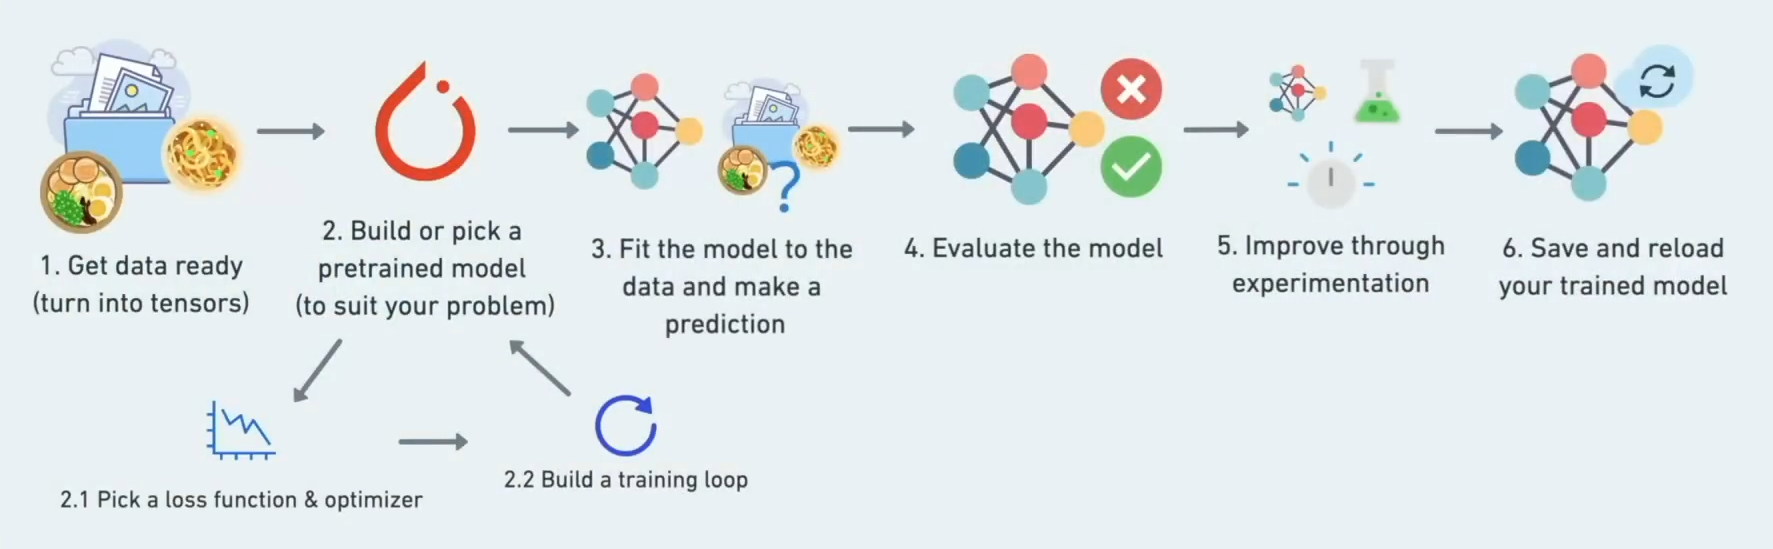

### What will this notebook cover?
1. data prepare and load
2. build model
3. fitting the model to the data (training)
4. making predictions and evaluating a model (inference)
5. saving and loading a model
6. putting it all together

### Importing dependencies

In [2]:
import torch 
from torch import nn
import matplotlib.pyplot as plt 

### Data Preparation

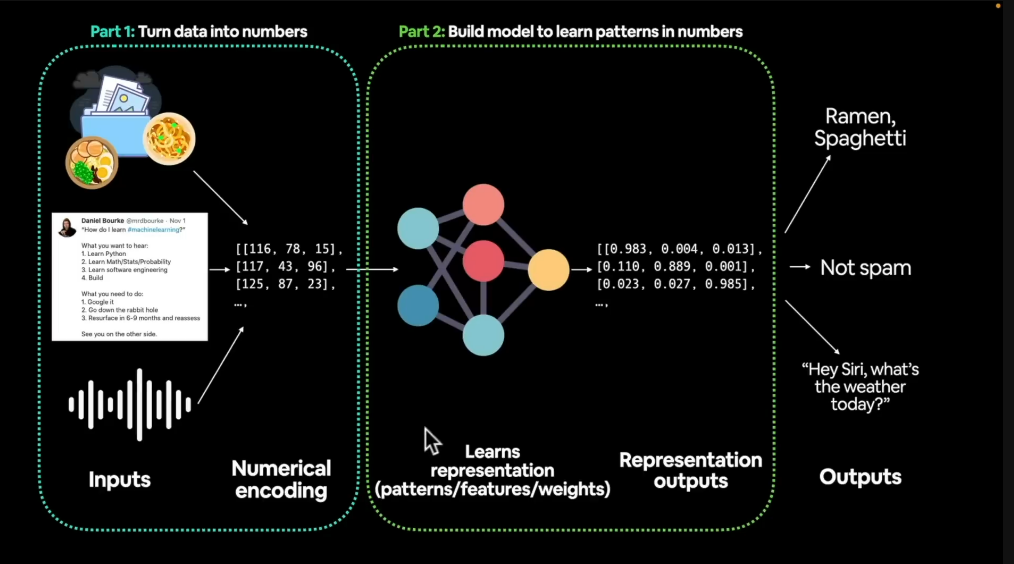

In [8]:
# create known parameters 
weight = 0.8
bias = 0.3

X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1)
y = weight*X + bias
X[:10,], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3160],
         [0.3320],
         [0.3480],
         [0.3640],
         [0.3800],
         [0.3960],
         [0.4120],
         [0.4280],
         [0.4440]]))

In [9]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

In [19]:
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data

In [25]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
    """
    plots the training, test data and compare predictions.
    """
    plt.figure(figsize=(9,6))
  
    # Plot training data in blue
    plt.scatter(train_data, train_label, color='b', s=4, label='Training Data')
    
    # Plot the test data in green
    plt.scatter(test_data, test_label, color='g', s=4, label='Test Data')

    # Plot predictions if they exist
    if predictions is not None:
        plt.scatter(test_data, predictions, color='r', s=4, label='Predictions')

    # Show the legend
    plt.legend(prop={'size': 14})

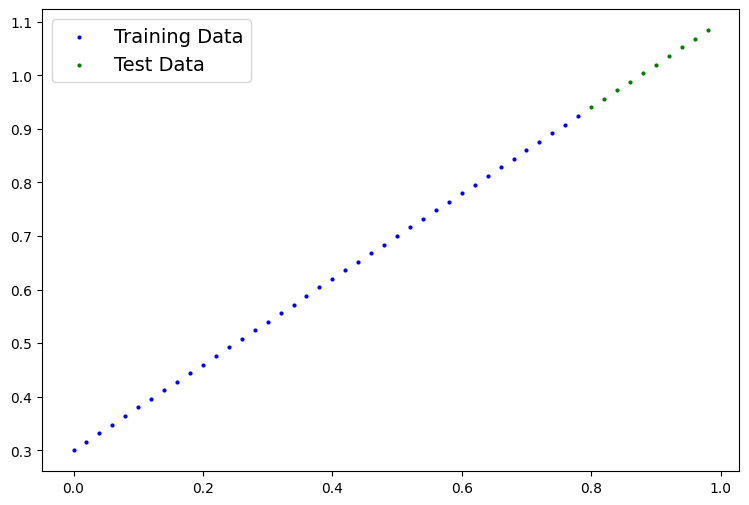

In [26]:
plot_predictions()

### Building Model

Let's create a linear regression model.

#### What our model does?
* Start with random parameters (weight & bias)
* Look at the training data and adjust the random values to better represent the ideal values (the weight & bias we used to create the data)

#### How does it do so?

Through two algorithms:
1. Gradient Descent [Learn](https://youtu.be/IHZwWFHWa-w)
2. Back Propagation [Learn](https://youtu.be/Ilg3gGewQ5U)



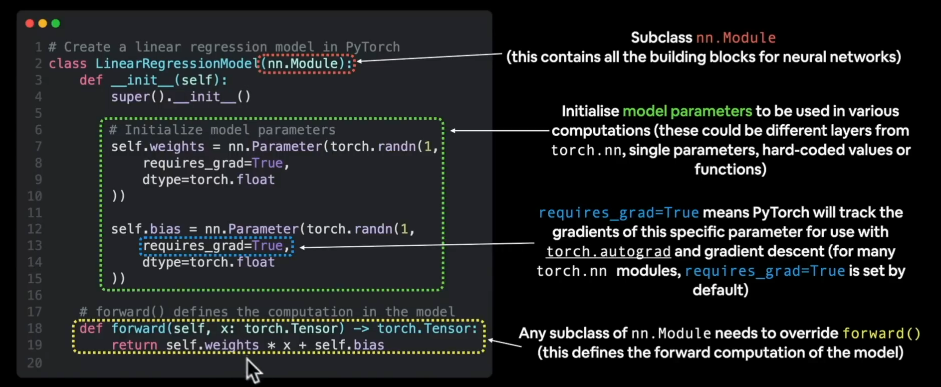

In [30]:
# Create Linear Regression model class 
class LinearRegressionModel(nn.Module):  # almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()

        # Initialize model parameters
        self.weights = nn.Parameter(torch.randn(1,    # start with a random weight and  
                                                requires_grad=True,  # can this parameter be updated via gradient descent
                                                dtype=torch.float))  # PyTorch loves torch.float32 dtype
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=troch.float))

        # Forward method to define the computation in the method
        def forward(self, x: torch.Tensor) -> torch.Tensor:  # x is the input data 
            return self.weights*x + self.bias  # Linear Regression formula

### Model building essentials

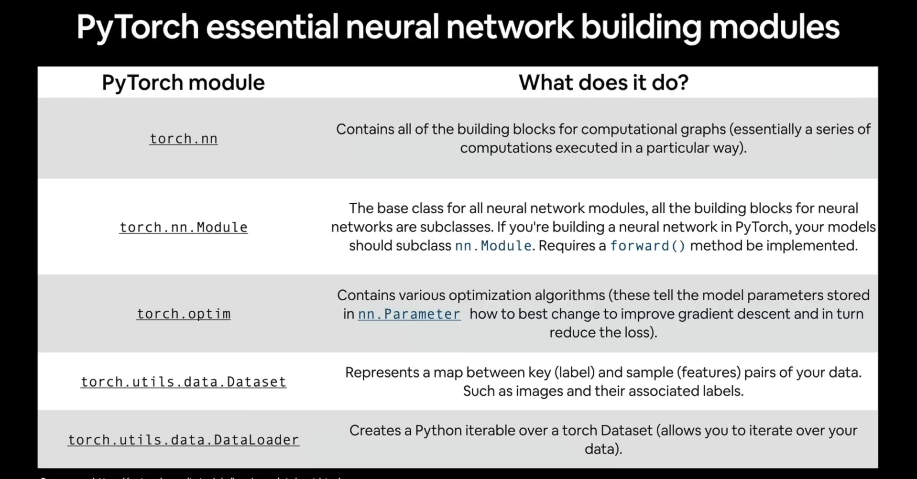

Learn more at PyTorch cheatsheet: (https://pytorch.org/tutorials/beginner/ptcheat.html)